In [1]:
#Necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import folium

# EDA

In [2]:
# Reading data
df = pd.read_csv("C:/Users/emanu/Pictures/real_estate.csv",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 1 to 410
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PurchaseDate         410 non-null    float64
 1   HouseAge             410 non-null    float64
 2   DistanceToStation    410 non-null    float64
 3   NumConvenientStores  410 non-null    int64  
 4   Latitude             410 non-null    float64
 5   Longitude            410 non-null    float64
 6   HousePrice           410 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.6 KB


In [3]:
df.head()

,PurchaseDate,HouseAge,DistanceToStation,NumConvenientStores,Latitude,Longitude,HousePrice
index,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
print(df['PurchaseDate'].unique())

[2012.917 2013.583 2013.5   2012.833 2012.667 2013.417 2013.083 2013.333
 2013.25  2012.75  2013.    2013.167]


In [5]:
def convertir_a_anio_mes(fecha_float):
    ano = int(fecha_float)
    mes_frac = (fecha_float - ano) * 12
    mes = int(round(mes_frac))

    # Adjust for December of the year before
    if mes == 0:
        ano -= 1
        mes = 12

    return f"{ano}-{mes:02d}"

In [6]:
#Applying the function to "PurchaseDate" column for better plotting format
df_temp = df.copy()
df_temp['PurchaseDateTranform'] = df_temp['PurchaseDate'].apply(convertir_a_anio_mes)

#Printing origianl format and new format
for idx, row in df_temp.iterrows():
    print(f"Original: {row['PurchaseDate']}, Tranform: {row['PurchaseDateTranform']}")

Original: 2012.917, Tranform: 2012-11
Original: 2012.917, Tranform: 2012-11
Original: 2013.583, Tranform: 2013-07
Original: 2013.5, Tranform: 2013-06
Original: 2012.833, Tranform: 2012-10
Original: 2012.667, Tranform: 2012-08
Original: 2012.667, Tranform: 2012-08
Original: 2013.417, Tranform: 2013-05
Original: 2013.5, Tranform: 2013-06
Original: 2013.417, Tranform: 2013-05
Original: 2013.083, Tranform: 2013-01
Original: 2013.333, Tranform: 2013-04
Original: 2012.917, Tranform: 2012-11
Original: 2012.667, Tranform: 2012-08
Original: 2013.5, Tranform: 2013-06
Original: 2013.583, Tranform: 2013-07
Original: 2013.25, Tranform: 2013-03
Original: 2012.75, Tranform: 2012-09
Original: 2013.417, Tranform: 2013-05
Original: 2012.667, Tranform: 2012-08
Original: 2013.417, Tranform: 2013-05
Original: 2013.417, Tranform: 2013-05
Original: 2012.917, Tranform: 2012-11
Original: 2013.083, Tranform: 2013-01
Original: 2013.0, Tranform: 2012-12
Original: 2013.083, Tranform: 2013-01
Original: 2012.667, Tr

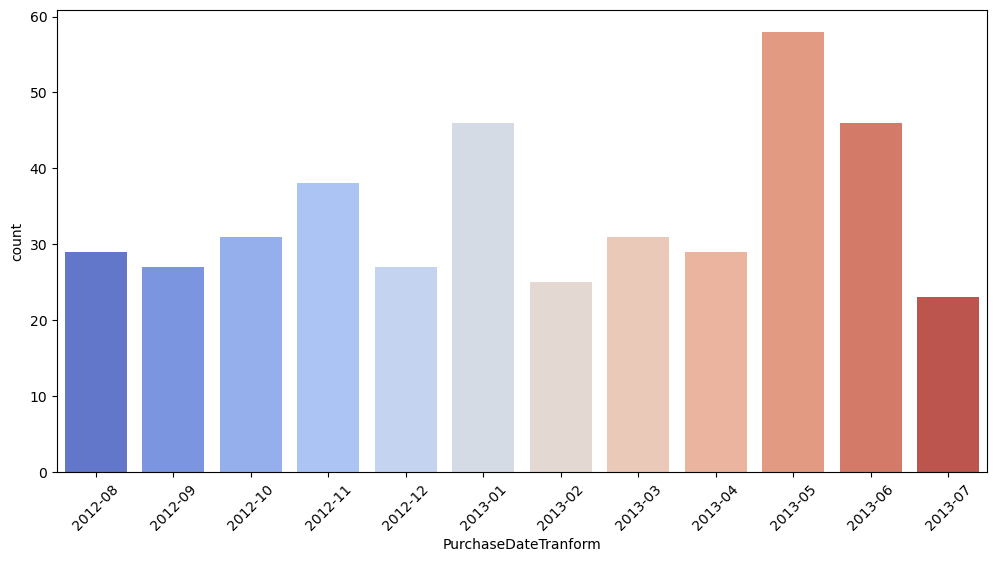

In [7]:
# Assuming df_temp is your DataFrame and 'PurchaseDateTransform' is the column
df_temp['PurchaseDateTranform'] = pd.to_datetime(df_temp['PurchaseDateTranform']).dt.to_period('M')
df_temp_sorted = df_temp.sort_values('PurchaseDateTranform')

plt.figure(figsize=(12, 6))
sns.countplot(x='PurchaseDateTranform', data=df_temp_sorted, palette="coolwarm")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

When comparing May 2013 to other days, we can see that it has the largest record of transactions. Similar to this, sales were greater than the noted average in November 2012, January 2013, and June 2013.

In [8]:
# Descriptive statistics
df.describe()

,PurchaseDate,HouseAge,DistanceToStation,NumConvenientStores,Latitude,Longitude,HousePrice
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,2013.149407,17.790244,1092.809716,4.060976,24.968985,121.533280,37.845854
std,0.281664,11.408640,1264.941065,2.935940,0.012454,0.015399,13.579430
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.250000,289.324800,1.000000,24.962990,121.527600,27.400000
50%,2013.167000,16.150000,492.231300,4.000000,24.971100,121.538535,38.350000
75%,2013.417000,28.350000,1455.798000,6.000000,24.977455,121.543438,46.350000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


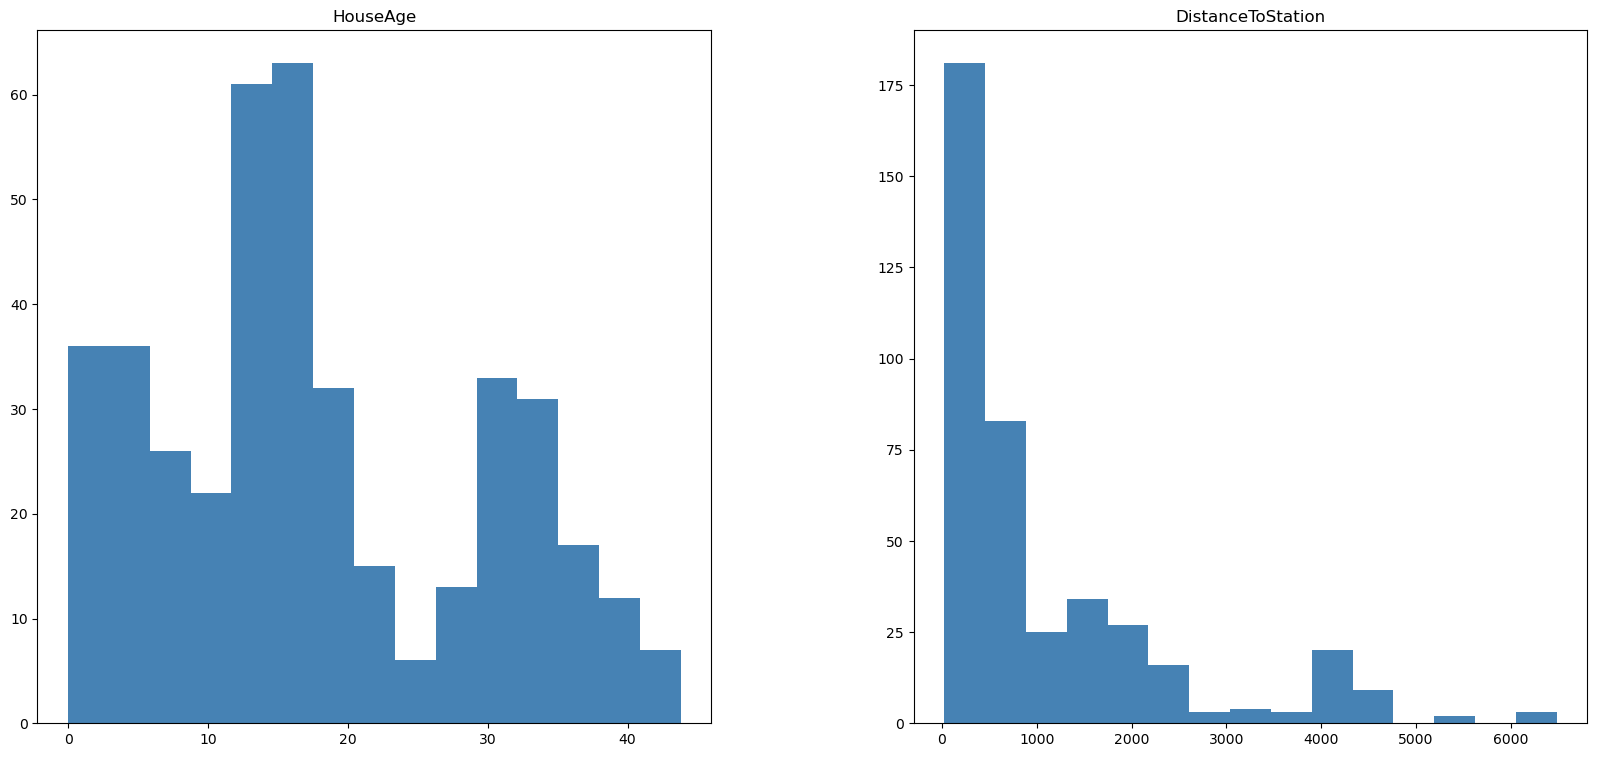

In [9]:
# Distribution of continous variables
fig = df[['HouseAge',
          'DistanceToStation'
          ]].hist(bins=15,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(20,9),
                 grid=False)

## Outliers

C:\Users\emanu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


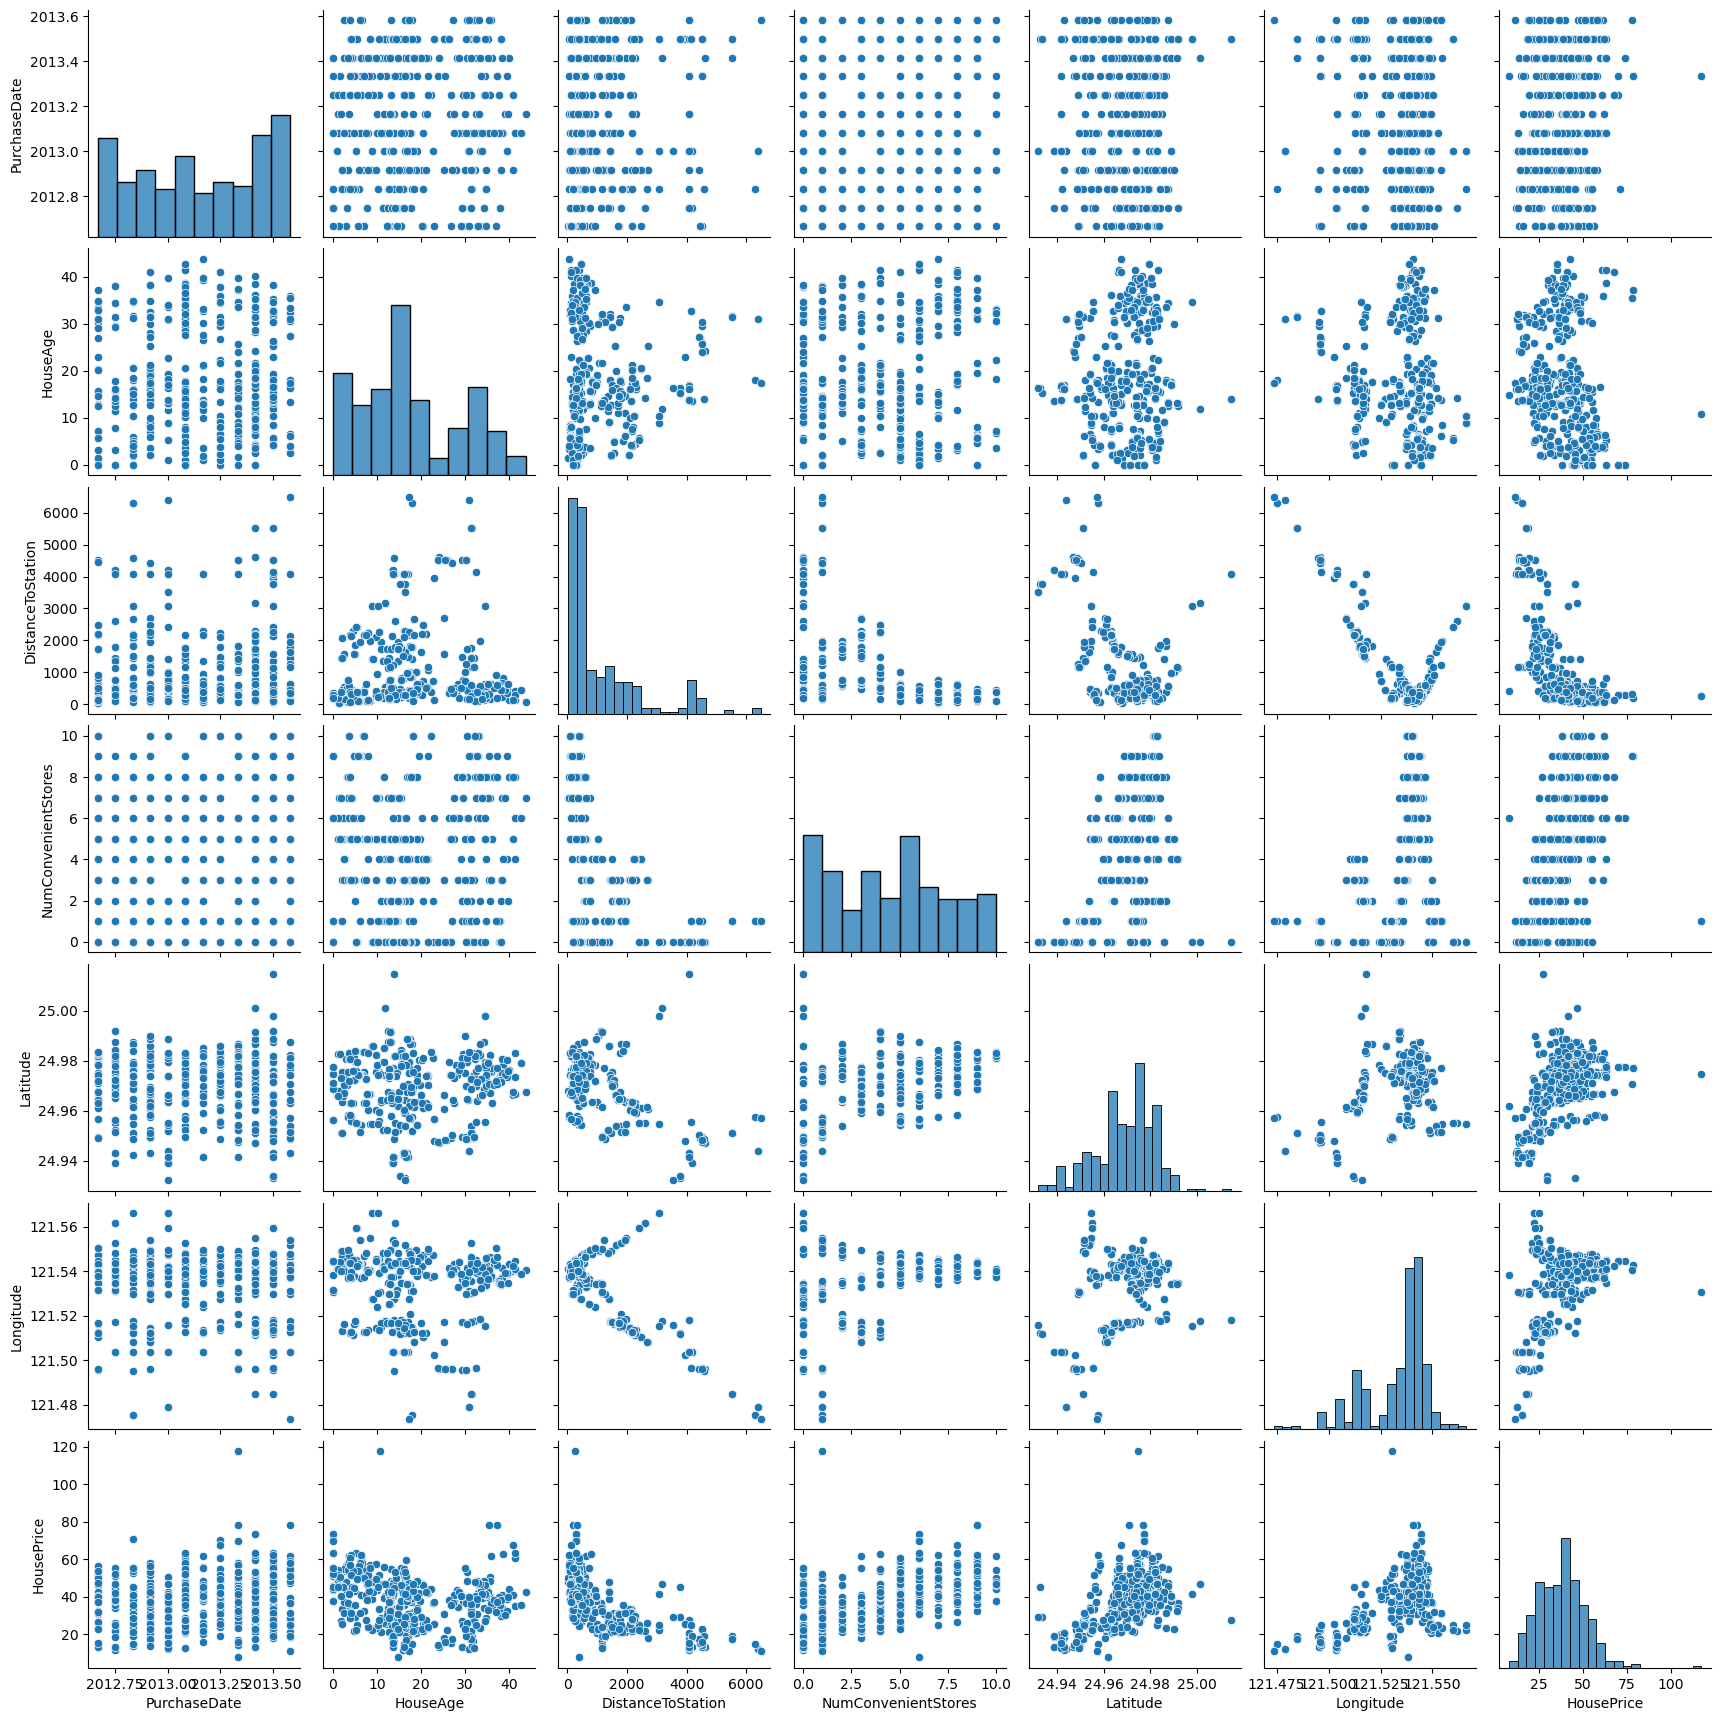

In [10]:
#Outliers
sns.pairplot(df)

From the previous graph, we can observe that the property with the highest price may be an outlier, so it may be excluded when building our final model.

## Correlations

<Axes: >

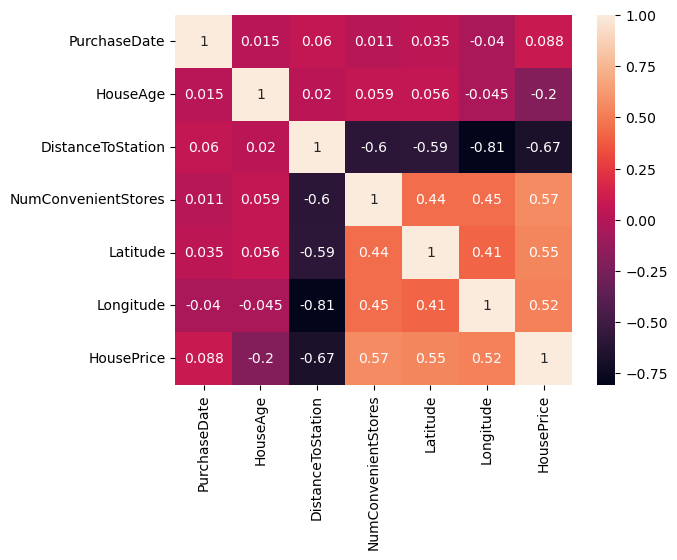

In [11]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

DistanceToStation has a high negative correlation with:

* NumCovenientStores (-0.60)
* Latitude (-0.60)
* Longitude (-0.80)
* HousePrice (-0.67)

HousePrice has a high correlation with:

* NumCovenientStores (0.57)
* Latitude (0.55)
* Longitude (0.52)

# Analyzing location 

In [56]:
percentiles = df['HousePrice'].quantile([0, 0.25, 0.5, 0.75, 1.0])
percentiles

0.00     7.600
0.25    27.300
0.50    38.250
0.75    46.125
1.00    78.000
Name: HousePrice, dtype: float64

In [60]:
# Create a map centered around mean latitude and longitude
my_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Define color categories
color_categories = {
    'Low': 'lightblue',         # HousePrice < 25
    'Medium': 'skyblue',        # HousePrice between 25 and 45
    'High': 'royalblue',        # HousePrice between 45 and 70
    'Very High': 'darkblue'     # HousePrice > 70
}

# Add circles for each data point
for index, row in df.iterrows():
    if row['HousePrice'] < 25:
        color = color_categories['Low']
    elif 25 <= row['HousePrice'] < 45:
        color = color_categories['Medium']
    elif 45 <= row['HousePrice'] < 70:
        color = color_categories['High']
    else:
        color = color_categories['Very High']

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,  # Adjust the circle size as needed
        color=color,
        fill=True,
        fill_opacity=0.5,
        popup=f"Price: {row['HousePrice']}"
    ).add_to(my_map)

# Add legend with corrected background colors
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; font-size: 14px;">
    <p><span style="background-color: lightblue; border: 1px solid gray; padding: 2px 6px;"></span> Price < 25</p>
    <p><span style="background-color: skyblue; border: 1px solid gray; padding: 2px 6px;"></span> 25 <= Price < 45</p>
    <p><span style="background-color: royalblue; border: 1px solid gray; padding: 2px 6px;"></span> 45 <= Price < 70</p>
    <p><span style="background-color: darkblue; border: 1px solid gray; padding: 2px 6px;"></span> Price >= 70</p>
</div>
"""


my_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map with legend
my_map

In [61]:
# Create a map centered around mean latitude and longitude
my_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15)

# Define color categories
color_categories = {
    0: 'green',        # Zero stores
    1: 'white',     # 1 to 3 stores
    2: 'grey',      # 4 to 6 stores
    3: 'black'      # 7 or more stores
}

# Add circles for each data point
for index, row in df.iterrows():
    if row['NumConvenientStores'] == 0:
        color = 'green'
    elif row['NumConvenientStores'] <= 3:
        color = 'white'
    elif row['NumConvenientStores'] <= 6:
        color = 'grey'
    else:
        color = 'black'

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,  # Adjust the circle size as needed
        color=color,
        fill=True,
        fill_opacity=0.5,
        popup=f"Stores: {row['NumConvenientStores']}"
    ).add_to(my_map)

# Add legend with corrected background colors
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; font-size: 14px;">
    <p><span style="background-color: green; border: 1px solid gray; padding: 2px 6px;"></span> No Stores</p>
    <p><span style="background-color: white; border: 1px solid gray; padding: 2px 6px;"></span> 1-3 Stores</p>
    <p><span style="background-color: grey; border: 1px solid gray; padding: 2px 6px;"></span> 4-6 Stores</p>
    <p><span style="background-color: black; border: 1px solid gray; padding: 2px 6px;"></span> 7+ Stores</p>
</div>
"""


my_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map with legend
my_map


# Modelling 

## Q1. B  model without any of the preprocessing for the features

In [ ]:
# Creating label and features variables
target = df["HousePrice"]
data = df.drop(["HousePrice"] , axis=1)

In [ ]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(data, target,
test_size=0.1, shuffle=True, random_state=1)

In [ ]:
# Creating 
linreg = LinearRegression() 
linreg.fit(x_train, y_train) 

In [ ]:
# Predicting values
linreg.predict(x_test)

In [25]:
# function to get the metrics
def metrics(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'The r2 score is {r2}') 
    print(f'The mean square error is {mse}')
    print(f'The mean absolute error is {mae}')

In [ ]:
# Calculating the model metrics
metrics(y_test,linreg.predict(x_test))

# Q1. B model model with all of the suggested preprocessing

In [45]:
# Removing the outlier
max_house_price = df['HousePrice'].max()

# Remove rows with the highest HousePrice
df = df[df['HousePrice'] < max_house_price]

In [46]:
# Creating label and features variables
target = df["HousePrice"]
data = df.drop(["HousePrice"] , axis=1)

In [47]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(data, target,
test_size=0.1, shuffle=True, random_state=1)

In [48]:
# Normalise and scale the numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
#mms_X = MinMaxScaler(feature_range=(0, 1))

In [49]:
# Normalise and scale the numerical features
x_train = scaler.fit_transform(x_train)
#x_train = mms_X.fit_transform(x_train)

In [50]:
# Normalise and scale the numerical features (test)
x_test = scaler.transform(x_test)
#x_test = mms_X.transform(x_test)

In [51]:
# Creating instance
linreg = LinearRegression() 
linreg.fit(x_train, y_train) 

LinearRegression()

In [52]:
# Predicting values
linreg.predict(x_test)

array([26.28527792, 29.33906217, 39.79524655, 28.04735949, 39.3239308 ,
       38.14815357, 46.21917954, 40.82326654, 45.43669754, 53.99948135,
       15.87191644, 54.58144803, 38.03025445, 44.33879986, 47.62638624,
       43.64312532, 37.20531603, 30.8757362 , 38.2023212 , 42.63944604,
       35.79260759, 46.93300393, 39.20537871, 33.84120357, 36.12794818,
       42.60196808, 42.19913431, 36.78026179, 46.96523055, 13.61316197,
       51.25994426, 45.82963882, 49.86326793,  9.49153469, 38.56475748,
       41.44432003, 45.01842512, 51.32768458, 28.7930811 , 33.58919247,
       37.49420254])

In [53]:
# Model coefficients
coefficients = pd.DataFrame({'Feature': data.columns, 'Coefficient': linreg.coef_})
print("Coefficients:")
print(coefficients)

Coefficients:
               Feature  Coefficient
0         PurchaseDate     1.331141
1             HouseAge    -3.063738
2    DistanceToStation    -4.967339
3  NumConvenientStores     3.654261
4             Latitude     2.885414
5            Longitude     0.222601


In [54]:
# Calculating the model metrics
metrics(y_test,linreg.predict(x_test))

The r2 score is 0.7098873882975925
The mean square error is 34.74912600799268
The mean absolute error is 4.754339348332477


In [55]:
from sklearn.preprocessing import StandardScaler

# Coefficients of the model
coefficients = {
    'PurchaseDate': 4.350049,
    'HouseAge': -10.979373,
    'DistanceToStation': -25.780734,
    'NumConvenientStores': 13.119234,
    'Latitude': 18.358602,
    'Longitude': -0.413889
}

# Features of the items
items = [
    {'PurchaseDate': 2012.667, 'HouseAge': 5.6, 'DistanceToStation': 90.45606, 'NumConvenientStores': 9, 'Latitude': 24.97433, 'Longitude': 121.5431},
    {'PurchaseDate': 2013.250, 'HouseAge': 18.8, 'DistanceToStation': 390.9696, 'NumConvenientStores': 7, 'Latitude': 24.97923, 'Longitude': 121.53986},
    {'PurchaseDate': 2013.000, 'HouseAge': 8.1, 'DistanceToStation': 104.8101, 'NumConvenientStores': 5, 'Latitude': 24.96674, 'Longitude': 121.54067},
    {'PurchaseDate': 2013.500, 'HouseAge': 6.5, 'DistanceToStation': 90.45606, 'NumConvenientStores': 9, 'Latitude': 24.97433, 'Longitude': 121.5431}
]

# Scale the features of the new observations
scaled_items = scaler.fit_transform([[item[feature] for feature in coefficients.keys()] for item in items])

# Predict house prices for each item
predicted_prices = []
for item in scaled_items:
    predicted_price = sum(coefficient * value for coefficient, value in zip(coefficients.values(), item))
    predicted_prices.append(predicted_price)

# Output the predicted prices
for i, price in enumerate(predicted_prices, start=1):
    print(f"Predicted price for item {i}: ${price:.2f}")



Predicted price for item 1: $32.48
Predicted price for item 2: $-41.82
Predicted price for item 3: $-33.03
Predicted price for item 4: $42.37
